<center><h1> Homework 1  </h1></center>
<center><h2> Practical component</h2></center> 
<center><h3> Dorsaf Sallami</h3></center> 
<center><h3> </h3></center> 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/UdeM \courses/ML20/HW1

Mounted at /content/drive
/content/drive/My Drive/UdeM courses/ML20/HW1


In [ ]:
#contain the code of solution.py
%run ./solution.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import the data
banknote = np.genfromtxt( 'data_banknote_authentication.txt' , delimiter= ',' )

#split the data 
train_set , valid_set , test_set = split_dataset(banknote)
train_x = train_set[:, :-1]
train_y = train_set[:, -1]

valid_x = valid_set[:, :-1]
valid_y = valid_set[:, -1]

test_x = test_set[:, :-1]
test_y = test_set[:, -1]

# h and sigma values
h = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
sigma = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]

#number of random projections
random_project = 500

#Question5

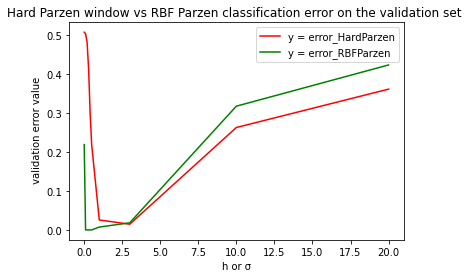

In [ ]:
error_valid = ErrorRate (train_x , train_y , valid_x , valid_y)
#Hard Parzen window’s classification error on the validation set
h = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
hs = np.array([error_valid.hard_parzen(i) for i in h])
#RBF Parzen’s classification error on the validation set
sigma = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
sigmas = np.array([error_valid.soft_parzen(j) for j in sigma])
#Single plot with two lines
plt.plot(h, hs, color='red')
plt.plot(sigma, sigmas, color='green')
plt.xlabel('h or σ')
plt.ylabel(' validation error value')
plt.legend(['y = error_HardParzen', 'y = error_RBFParzen'])
plt.title('Hard Parzen window vs RBF Parzen classification error on the validation set ')
plt.show()

##Observations and Discussion

<p>The plot above shows how the classification error depends on the hyperparameters h and σ.</p>
<p>We can divide this graph, essentially, into three parts: </p>

1.   h and σ are close to zero:<br/>
When h and σ are between {0.01, 0.1, 0.2, 0.3, 0.4, 0.5}, we can see that the classification error is too high, especially for the Hard Parzen window.
2.   h and σ are between {1.0, 3.0}:<br/> We notice that we have the smaller classification errors for both algorithms.
1.   Beyond the value 3.0: <br/>
When h and σ are between {10.0, 20.0}, we observe that the classification error starts increasing again and becomes too high, especially for the RBF Parzen window

<p>Clearly, we see that the hyperparameters affect the capacity of the algorithms: </p>


*   When we have small hyperparameters (h and σ), the training data will be perfectly predicted and the bias will be low. However, when it comes to new data, it has higher chance to be an error, which causes high variance (Overfitting).
*   With higher hyperparameters values, we have more voters/neighbors in each prediction.Therefore, the training error will increase (increased bias), but the test error may decrease at the same time (lower variance).So, the algorithm can't capture the variability in the data, poor generalization to other data(Underfitting).

*    Approximately, for our case case, the optimal value is 2.













#Question7


##Running time complexity
<p>Variables:</p>

*   n: number of examples
*   d: input dimension
*   c: number of classes
*   neighbours_h: number of neighbours within some given length h 




### Hard Parzen window:
<p> In Parzen with hard neighbourhood, we consider all
neighbours within some given length h ( hyper-parameter) </p>
<p>To achieve this: </p>

*   It is necessary to compute the distance from the new observation to training set observations: Each distance computation requires O(d) runtime, so  to find the distance of the n examples we need O(n.d).
*   Select all neighbours within some given length h(neighbours_h) and loop through neighbours_h to get their votes.

<p>Therfore, the complexity of the Hard parzen window is O(neighbours_h.n.d)
</p>





### RBF Parzen:
<p>Similar to Hard parzen, but instead a few points voting, in RBF Parzen <b> all training points </b> vote.
We take a weighted vote (using a kernel), the closest the point is to the test point, the more weight its vote has.</p>
<p>Therfore, the complexity of the RBF parzen window is O(n.n.d)
</p>

#Question9

In [ ]:
#Hard Parzen window’s and RBF Parzen’s classification error on the validation set on 500 random projections of the training set

hardparzen_randomprojections=[]
softparzen_randomprojections=[]

for rd in range(random_project):
  A=np.random.randn(4,2)  
  error_valid=ErrorRate(random_projections(train_x,A),train_y,random_projections(valid_x,A),valid_y)
  error_h=np.array([error_valid.hard_parzen(i) for i in h])
  hardparzen_randomprojections.append(error_h)
  error_sigma=np.array([error_valid.soft_parzen(j) for j in sigma])
  softparzen_randomprojections.append(error_sigma)

hardparzen_randomprojections=np.array(hardparzen_randomprojections)
softparzen_randomprojections=np.array(softparzen_randomprojections)


In [ ]:
# Calculate the standard deviation
h_std = hardparzen_randomprojections.std(axis=0)
#print(h_std)
sigma_std = softparzen_randomprojections.std(axis=0)
#print(sigma_std)


# Calculate the average
h_mean = hardparzen_randomprojections.mean(axis=0)
#print(h_mean)
sigma_mean = softparzen_randomprojections.mean(axis=0)
#print(sigma_mean)

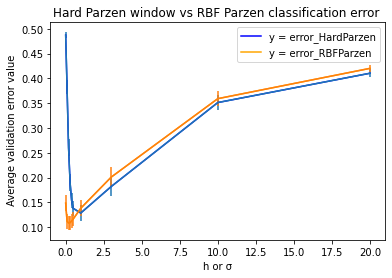

In [ ]:
# Build the plot
plt.errorbar(h,h_mean,yerr=h_std*0.2)
plt.plot(h,h_mean,color='blue')
plt.errorbar(h,sigma_mean,yerr=sigma_std*0.2)
plt.plot(h,sigma_mean,color='orange')

plt.legend(['y = error_HardParzen', 'y = error_RBFParzen'])
plt.xlabel('h or σ')
plt.ylabel(' Average validation error value')
plt.title('Hard Parzen window vs RBF Parzen classification error ')
plt.show()

##Observations and Discussion

<p>Comparing this graph with the result of question5, we can see that the variation of the plot above very fast (the variation of plot in question5 is more slow).</p>
<p> Also, the gap between the Hard parzen and the RBF parzen is very clear in question5 than with random projections in which this gap is more smaller.</p>
<p>Random projection is a technique used to reduce the dimensionality of a set of points which lie in Euclidean space[ Wikipedia]. And as we discussed in question7, the complexity of both algorithm depends on input dimensions so with low dimensions we get low complexity.</p>
